In [143]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import plotly.express as px

file = 'export.geojson'

df = gpd.read_file(file)

print(df.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 87 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        978 non-null    object  
 1   @id                       978 non-null    object  
 2   ISO3166-2                 1 non-null      object  
 3   addr:city                 25 non-null     object  
 4   addr:full                 2 non-null      object  
 5   addr:housenumber          1 non-null      object  
 6   addr:place                2 non-null      object  
 7   addr:postcode             27 non-null     object  
 8   addr:street               2 non-null      object  
 9   addr:suburb               2 non-null      object  
 10  admin_level               3 non-null      object  
 11  amenity                   31 non-null     object  
 12  area                      6 non-null      object  
 13  boundary                  3 non-null      

In [144]:
attributes = ['type', 'name', 'geometry']
df = df[attributes]
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   type      8 non-null      object  
 1   name      36 non-null     object  
 2   geometry  978 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 23.0+ KB


In [145]:
import geopandas as gpd
from shapely.geometry import Point

youcode_attributes = {
    'type': 'Education',
    'name': 'Youcode',
    'geometry': Point(-8.521004975695364, 32.247655126194196)
}

cafe_attributes = {
    'type': 'Coffe shop',
    'name': 'Roma coffee shop',
    'geometry': Point(-8.538807283897649, 32.24059906695106)
}

hopital_attributes = {
    'type': 'Hospital',
    'name': 'Cheikh Zayed Hospital',
    'geometry': Point(-8.522090122060812, 32.248944432935964)
}

mosque_attributes = {
    'type': 'Mosque',
    'name': 'Al Firdaouss Mosque',
    'geometry': Point(-8.537845060012614, 32.24201018307274)
}

youcode_gdf = gpd.GeoDataFrame([youcode_attributes], crs=gdf.crs)
cafe_gdf = gpd.GeoDataFrame([cafe_attributes], crs=gdf.crs)
hopital_gdf = gpd.GeoDataFrame([hopital_attributes], crs=gdf.crs)
mosque_gdf = gpd.GeoDataFrame([mosque_attributes], crs=gdf.crs)

df = df.append(youcode_gdf)
df = df.append(cafe_gdf)
df = df.append(hopital_gdf)
df = df.append(mosque_gdf)

df

<ipython-input-145-71899e37531e>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(youcode_gdf)
<ipython-input-145-71899e37531e>:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(cafe_gdf)
<ipython-input-145-71899e37531e>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hopital_gdf)
<ipython-input-145-71899e37531e>:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(mosque_gdf)


,type,name,geometry
0,route,Route Nationale 11,"MULTILINESTRING ((-8.42806 32.65637, -8.42811 ..."
1,boundary,Youssoufia ⵢⵓⵙⴼⵉⵢⴰ اليوسفية,"POLYGON ((-8.53836 32.27015, -8.53955 32.26697..."
2,boundary,Province de Youssoufia إقليم اليوسفية,"POLYGON ((-8.80293 31.75551, -8.80213 31.75547..."
3,route,Safi - Ben Guerir أسفي - ابن جرير,"MULTILINESTRING ((-9.22670 32.22701, -9.22198 ..."
4,boundary,Pachalik de Youssoufia باشوية اليوسفية,"POLYGON ((-8.53836 32.27015, -8.53955 32.26697..."
...,...,...,...
977,NaN,NaN,POINT (-8.52044 32.25193)
0,Education,Youcode,POINT (-8.52100 32.24766)
0,Coffe shop,Roma coffee shop,POINT (-8.53881 32.24060)
0,Hospital,Cheikh Zayed Hospital,POINT (-8.52209 32.24894)


In [146]:
missing_values = df.isnull().sum()

missing_values

type        970
name        942
geometry      0
dtype: int64

<Axes: >

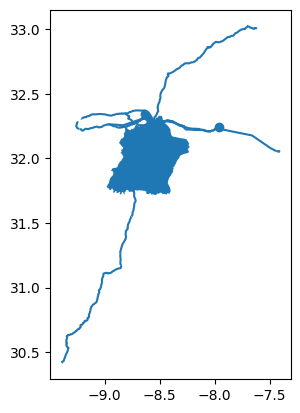

In [147]:
df.plot()

In [153]:
filtered_df = df[df['type'].isin(['Education', 'Mosque', 'Coffe shop', 'Hospital'])]
filtered_df

,type,name,geometry
0,Education,Youcode,POINT (-8.52100 32.24766)
0,Coffe shop,Roma coffee shop,POINT (-8.53881 32.24060)
0,Hospital,Cheikh Zayed Hospital,POINT (-8.52209 32.24894)
0,Mosque,Al Firdaouss Mosque,POINT (-8.53785 32.24201)


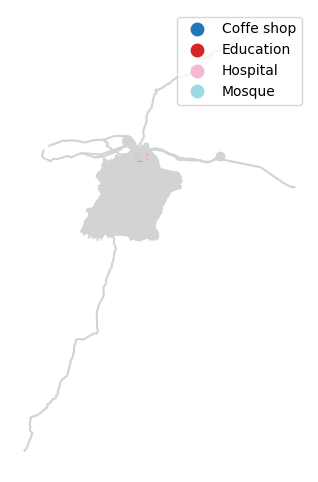

In [155]:
fig, ax = plt.subplots(figsize=(12, 6))

df.plot(ax=ax, color='lightgrey')

filtered_df.plot(column='type', ax=ax, cmap='tab20', legend=True)

ax.set_axis_off()

plt.show()

In [156]:
m = folium.Map(location=[32.246844749437734, -8.52468086856831], zoom_start=16, tiles="CartoDB positron")
for _, r in filtered_df.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "blue"})
    folium.Popup(r['name']).add_to(geo_j)
    geo_j.add_to(m)

m